### Тема: Интерполяция функций. Полиномы Лагранжа, Ньютона

**Выполнил**: Лежнин Максим Витальевич (ПМ-21)

**Преподаватель**: Гурьянов М.А., кафедра ВМ-1

###### Лабораторная работа № **3**, вариант № **23**

###### Весенний семестр, 2023 год

###### МИЭТ, Зеленоград

# Теоретическая справка

#### Решаемая проблема

Пусть нам дано конечное множество пар элементов $(x, y)$, отражающее некоторую функиональную зависимость $y(x)$. Для определенности пусть в нашем множестве $n + 1$ пар и $x_0 < x_2 < ... < x_n$. На практике вполне возможной задачей может быть получение значения функции $y(x)$ в точках, которые не указаны в данном множестве. Если нам нужно найти значения функции $y(x)$ при $x \in [x_0,\, x_n]$, то задача зовется интерполяцией, в случае же когда $x \notin [x_0,\, x_n]$ - это экстраполяция.

В данной лабороторной работе мы рассмотрим именно интерполяцию. Довольно распространненым методом интерполяции являются многочлены n-ной степени (при заданном множестве пар из $n + 1$ элемента).

#### Многочлен Лагранжа
Будем называть $x_i,\, i = 0,\, 1,\, ...,\, n$ узлами интерполяции. Рассмотрим многочлен:
$P_n(x) = a_nx^n + a_{n - 1}x^{n - 1} + ... + a_1x + a_0$, степени не выше n.
Потребуем, чтобы $P_n(x)$ совпадал с функцией в табличных точках, то есть $P_n(x_k) = y_k,\, k = 0,\, 1,\, ...,\, n$. Получим систему уравнений относительно $a_k,\, k = 0,\, 1,\, ...,\, n$:

$
\begin{cases}
a_nx_0^n + a_{n - 1}x_0^{n - 1} + ... + a_1x_0 + a_0 = y_0, \\
a_nx_1^n + a_{n - 1}x_1^{n - 1} + ... + a_1x_1 + a_0 = y_1, \\
... \\
a_nx_n^n + a_{n - 1}x_n^{n - 1} + ... + a_1x_n + a_0 = y_n.
\end{cases}
$

Определитель матрицы коэфициентов этой системы уравнений есть определитель Вандермонда:

$
\triangle = 
\begin{vmatrix}
1 & x_0 & x_0^2 & ... & x_0^n \\ 
1 & x_1 & x_1^2 & ... & x_1^n \\ 
... & ... & ... & ... & ... \\ 
1 & x_n & x_n^2 & ... & x_n^n
\end{vmatrix}
= \prod\limits_{\substack{i,\, j = 0 \\ (i \neq j)}}^n (x_i - x_j).
$

Так как $x_0 < x_2 < ... < x_n$, то $\triangle \neq 0$. А это значит, что система имеет решение. А конкретнее, следующий многочлен в точности соответствует этому решению:

$P_n(x) = \sum\limits_{k = 0}^n y_k \frac{L_n^{(k)}(x)}{L_n^{(k)}(x_k)}$, где $L_n^{(k)}(x) = (x - x_0)...(x - x_{k - 1})(x - x_{k + 1})...(x - x_n)$ - полиномы n-ой степени специального вида.

#### Многочлен Ньютона
Рассмотрим иную форму записи интерполяционного полинома:
$P_n(x) = A_0 + A_1(x - x_0) + A_2(x - x_0)(x - x_1) + ... + A_n(x - x_0)(x - x_1)...(x - x_{n - 1})$

Требование совпадения значений полинома с заданными значениями функции приводит к системе уравнений с треугольной матрицей для неопределенных коэффициентов $A_i,\, i = 0,\, 1,\, ...,\, n$:
$
\begin{cases}
A_0 = f_0, \\
A_0 + A_1(x_1 - x_0) = f_1, \\
A_0 + A_1(x_2 - x_0) + A_2(x_2 - x_0)(x_2 - x_1) = f_2, \\
... \\
A_0 + A_1(x_n - x_0) + A_2(x_n - x_0)(x_n - x_1) + ... + A_n(x_n - x_0)(x_n - x_1)...(x_n - x_{n - 1}) = f_n.
\end{cases}
$

Это интерполяционный полином Ньютона. Он интересен тем, что каждая частичная сумма его первых $m + 1$ слагаемых представляет собой интерполяционный полином m-й степени, построенный по первым $m + 1$ табличным данным.

# Лабораторная работа:

### Задание 1
Используя линейную интерполяцию, найти значение функции в точках $t_i$ и сравнить с реальными значениями $f(t)$ в этих точках. Построить график $f(t)$ и ломаной, проходящей через пять заданных точек.

Пусть есть прибор, который в дискретные моменты времени выдаёт сигнал по закону $f(t)$. Допустим, наблюдатель зарегестрировал пять отсчётов в моменты времени $t_i$. Задачей наблюдателя (который на знает закона выдачи сигнала) является получение приближенного значения функции на отрезке $[0,\, 1]$ в любой момент времени.

$f(t) = \cos{\frac{\pi t}{4}}, \ \ \ t_i = \frac{i + 2}{8},\, i = 0,\, 1,\, 2,\, 3,\, 4$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Пусть нам известны значения функции на 5 равноудаленных точках отрезка $[0,\, 1]$. Тогда построим линейную интерполяцию и сравним значения функции и значения интерполяции в заданных точках $t_i$.

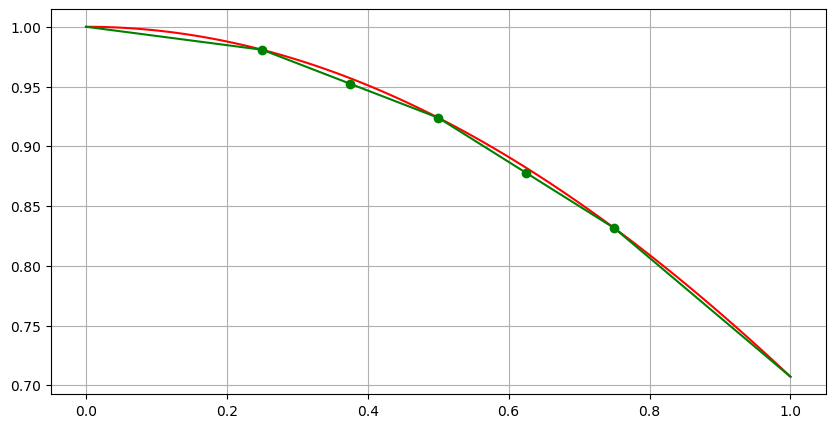

Point: 0.25
Value of function: 0.9807852804032304
Value of interpolation: 0.9807852804032304
Difference: 0.0

Point: 0.375
Value of function: 0.9569403357322088
Value of interpolation: 0.9523324064572586
Difference: 0.00460792927495024

Point: 0.5
Value of function: 0.9238795325112867
Value of interpolation: 0.9238795325112867
Difference: 0.0

Point: 0.625
Value of function: 0.881921264348355
Value of interpolation: 0.8776745724069159
Difference: 0.004246691941439118

Point: 0.75
Value of function: 0.8314696123025452
Value of interpolation: 0.8314696123025452
Difference: 0.0



In [2]:
# function
f = lambda t: np.cos(np.pi * t / 4)
# points to measure
t_i = np.array([(i + 2) / 8 for i in range(5)])

plt.figure(figsize=(10,5))
plt.grid(True)

# plotting function
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), c='r')

# plotting linear interpolation
t = np.linspace(0, 1, 5)
y =  np.array([f(i) for i in t])
plt.plot(t, f(t), c='g')

# getting function of interpolation to see difference between function and interpolation at points to measure
interpolated = np.interp(t_i, t, y)
for i in range(5):
    plt.plot(t_i[i], interpolated[i], 'o-g')

plt.show()

# some statistics
for i in range(len(t_i)):
    print("Point:", t_i[i])
    print("Value of function:", f(t_i[i]))
    print("Value of interpolation:", interpolated[i])
    print("Difference:", abs(f(t_i[i]) - interpolated[i]))
    print()

Значения линейной интерполяции и самой функции в известных нам точках не различаются, поскольку именно по этим точкам и построена интерполяция. Однако видны отклонения у интерполяции между этими точками, причем ближе к середине отрезков эти отклонения больше.

### Задание 2
Построить по заданным пяти точкам интерполяционный многочлен Лагранжа или Ньютона и, используя его, найдите значения функции в точках $t_i$. Сравните результаты со значениями, полученными при линейной интерполяцией, и значениями $f(t)$ в этих точках. Постройте графики $f(t)$ и интерполяционного многочлена. Какую максимальную ошибку мы подпускам при аппроксимации $f(t)$ данным полиномом?

In [3]:
# Lagrange interpolation method
def lagrange(x, y):
    def l(t):
        poly = 0
        for i in range(len(x)):
            l1 = 1
            for j in range(len(x)):
                if i == j:
                    continue
                l1 *= (t - x[j])
            l2 = 1
            for j in range(len(x)):
                if i == j:
                    continue
                l2 *= (x[i] - x[j])
            poly += y[i] * l1 / l2
        return poly
    return l

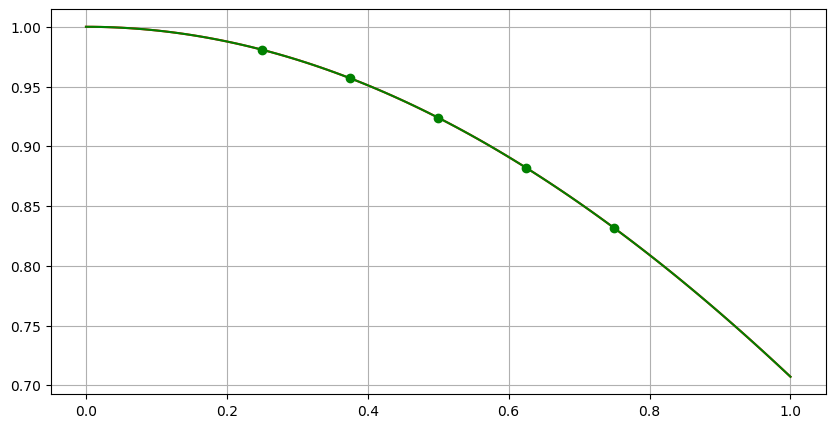

Point: 0.25
Value of function: 0.9807852804032304
Value of interpolation: 0.9807852804032304
Difference: 0.0

Point: 0.375
Value of function: 0.9569403357322088
Value of interpolation: 0.9569390847477998
Difference: 1.2509844090624611e-06

Point: 0.5
Value of function: 0.9238795325112867
Value of interpolation: 0.9238795325112867
Difference: 0.0

Point: 0.625
Value of function: 0.881921264348355
Value of interpolation: 0.8819226183607123
Difference: 1.3540123572353124e-06

Point: 0.75
Value of function: 0.8314696123025452
Value of interpolation: 0.8314696123025452
Difference: 0.0

Max error: 3.7893094723129295e-06


In [4]:
# function
f = lambda t: np.cos(np.pi * t / 4)
# points to measure
t_i = np.array([(i + 2) / 8 for i in range(5)])

plt.figure(figsize=(10,5))
plt.grid(True)

# plotting function
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), c='r')

# getting function of Lagrange's interpolation by known points and values of function
N = 5 # number of nodes for Lagrange's interpolation
t = np.linspace(0, 1, N)
y =  np.array([f(i) for i in t])
interpolated_func = lagrange(t, y)

# plotting Lagrange's interpolation
plt.plot(x, interpolated_func(x), c='g')

for i in range(5):
    plt.plot(t_i[i], interpolated_func(t_i[i]), 'og')

plt.show()

# some statistics
for i in range(len(t_i)):
    print("Point:", t_i[i])
    print("Value of function:", f(t_i[i]))
    print("Value of interpolation:", interpolated_func(t_i[i]))
    print("Difference:", abs(f(t_i[i]) - interpolated_func(t_i[i])))
    print()

# max error
max_error = 0
for i in range(len(x)):
    if abs(f(x[i]) - interpolated_func(x[i])) > max_error:
        max_error = abs(f(x[i]) - interpolated_func(x[i]))
print("Max error:", max_error)

### Задание 3
Найти значение интерполяционного полинома при $t = 2$. Почему оно так сильно отличается от значения $f(t)$ в этой точке?

In [5]:
# function
f = lambda t: np.cos(np.pi * t / 4)

# getting function of Lagrange's interpolation by known points and values of function
N = 5 # number of nodes for Lagrange's interpolation
t = np.linspace(0, 1, N)
y =  np.array([f(i) for i in t])
interpolated_func = lagrange(t, y)

error = abs(f(2) - interpolated_func(2))
print("Value of function:", f(2))
print("Value of interpolation:", interpolated_func(2))
print("Error:", error)

Value of function: 6.123233995736766e-17
Value of interpolation: 0.008905765931586984
Error: 0.008905765931586923


Имеется существенная ошибка, поскольку $t = 2$ лежит вне отрезка, на котором мы интерполируем функцию.

Задайте функцию Рунге $f(x) = \frac{1}{1 + 25x^2}$ на отрезке $[-5,\, 5]$ в десяти равноотстоящих точках. Сравните значения функции и интерполяционного полинома при $x = 4.5$. Постройте графики функции и полинома на задданом отрезке и объясните поведение интерполяционного полинома.

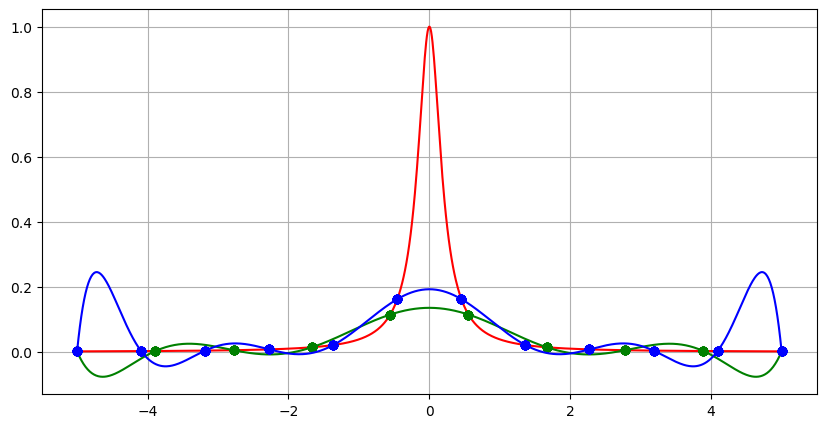

Point: 4.5
Value of function: 0.001971414489896501
Value of interpolation by 10 nodes: -0.0704934541952139
Value of interpolation by 12 nodes: 0.179962746065081


In [6]:
# function
f = lambda x: 1 / (1 + 25 * x**2)
# point to measure
x_0 = 4.5

plt.figure(figsize=(10,5))
plt.grid(True)

# plotting function
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x), c='r')

# getting function of Lagrange's interpolation by known points and values of function
N = 10 # number of nodes for Lagrange's interpolation
t = np.linspace(-5, 5, N)
y =  np.array([f(i) for i in t])
interpolated_func_10 = lagrange(t, y)

# plotting Lagrange's interpolation
plt.plot(x, interpolated_func_10(x), c='g')

for i in range(len(t)):
    plt.plot(t, y, 'og')
    
# getting function of Lagrange's interpolation by known points and values of function
N = 12 # number of nodes for Lagrange's interpolation
t = np.linspace(-5, 5, N)
y =  np.array([f(i) for i in t])
interpolated_func_12 = lagrange(t, y)

# plotting Lagrange's interpolation
plt.plot(x, interpolated_func_12(x), c='b')

for i in range(len(t)):
    plt.plot(t, y, 'ob')

plt.show()

# some statistics
print("Point:", x_0)
print("Value of function:", f(x_0))
print("Value of interpolation by 10 nodes:", interpolated_func_10(x_0))
print("Value of interpolation by 12 nodes:", interpolated_func_12(x_0))

При увеличении количества узлов расхождения на концах отрезка начинают стремительно увеличиваться. Это явление нащывают феноменом Рунге. Для того, чтобы избавиться от этих ошибок используют узлы Чебышёва, которыми мы сейчас и воспользуемся.

Для натурального числа n узлы Чебышёва на отрезке $[0,\, 1]$ задаются формулой:

$x_k = \cos{(\frac{2k - 1}{2n}\pi)},\ \ \ k = 1,\, 2,\, ...,\, n$

Для получения узлов на произвольном отрезке $[a,\, b]$ можно применить аффиннное преобразование отрезков:

$x_k = \frac{1}{2}(a + b) + \frac{1}{2}(b - a)\cos{(\frac{2k - 1}{2n}\pi)},\ \ \ k = 1,\, 2,\, ...,\, n$

In [7]:
def chebyshev_nodes(a, b, n):
    answer = []
    for i in range(n):
        answer.append((a + b)/2 + (b - a)/2 * np.cos((2*i + 1)/(2 * n)*np.pi))
    return answer

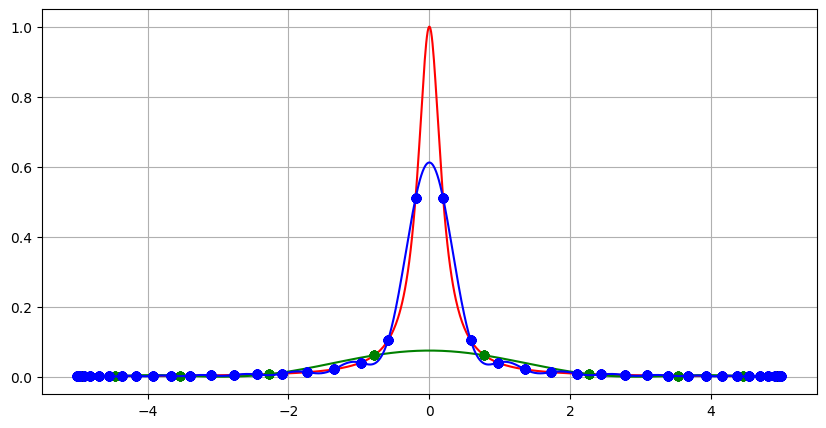

Point: 4.5
Value of function: 0.001971414489896501
Value of interpolation by 10 nodes: 0.0016053219829098879
Value of interpolation by 40 nodes: 0.001442993564860575


In [8]:
# function
f = lambda x: 1 / (1 + 25 * x**2)
# point to measure
x_0 = 4.5

plt.figure(figsize=(10,5))
plt.grid(True)

# plotting function
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x), c='r')

# getting function of Lagrange's interpolation by known points and values of function
N = 10 # number of nodes for Lagrange's interpolation
t = chebyshev_nodes(-5, 5, N)
y =  np.array([f(i) for i in t])
interpolated_func_10 = lagrange(t, y)

# plotting Lagrange's interpolation
plt.plot(x, interpolated_func_10(x), c='g')

for i in range(len(t)):
    plt.plot(t, y, 'og')
    
# getting function of Lagrange's interpolation by known points and values of function
N = 40 # number of nodes for Lagrange's interpolation
t = chebyshev_nodes(-5, 5, N)
y =  np.array([f(i) for i in t])
interpolated_func_40 = lagrange(t, y)

# plotting Lagrange's interpolation
plt.plot(x, interpolated_func_40(x), c='b')

for i in range(len(t)):
    plt.plot(t, y, 'ob')

plt.show()

# some statistics
print("Point:", x_0)
print("Value of function:", f(x_0))
print("Value of interpolation by 10 nodes:", interpolated_func_10(x_0))
print("Value of interpolation by 40 nodes:", interpolated_func_40(x_0))

### Дополнительное задание
Пусть нам нужно проинтерполировать многомерную функцию. Для простоты пусть будет функция двух переменных $f(x,\, y)$. Это можно сделать, например, многочленом Лагранжа. Но как он будет выглядеть? Выводить формулу не буду, а сразу же ее сюда выпишу:

$P_n(x) = \sum\limits_{i = 0}^n \sum\limits_{j = 0}^m f(x_i, y_j) \frac{L_{nm}^{(i,\, j)}(x,\, y)}{L_{nm}^{(i,\, j)}(x_i,\, y_j)}$, где $L_{nm}^{(i,\, j)}(x,\, y) = (x - x_0)...(x - x_{i - 1})(x - x_{i + 1})...(x - x_n) \cdot (y - y_0)...(y - y_{j - 1})(y - y_{j + 1})...(y - y_m)$ - полиномы специального вида.

Пусть нам дана функция $f(x,\, y) = \sin{x}e^{y^2}$. Нам надо проинтерполировать ее на плоскости $\{(x,\, y)|x \in [-3,\, 3],\, y \in [-2,\, 2]\}$. Также известны $N_1$ значений x и $N_2$ значений y, откуда мы получаем, что нам дано $N_1 \cdot N_2$ точек и значений функции $f(x,\, y)$ соотвественно. Значения $N_1$ и $N_2$ можно поправить, чтобы посмотреть, как количество узлов влияет на точность интерполяции. Напишем функцию, проинтерполируем ее и изобразим результат. Также посмотрим на значения функции и ее интерполяции в точках $(-2.5,\, -1.5),\, (-2.5,\, 1.5),\, (2.5,\, -1.5),\, (2.5,\, 1.5),\, (0,\, 0)$. И наконец найдем максимальную ошибку на всей плоскости $(x,\, y)$.

In [9]:
from mpl_toolkits import mplot3d

In [10]:
# Lagrange interpolation method for 2 variable functions
def lagrange_for_2var(function, var_x, var_y):
    def l(x, y):
        poly = 0
        for i in range(len(var_x)):
            for j in range(len(var_y)):
                f_xi_yj = function(var_x[i], var_y[j])
                
                l_nm1 = 1
                for k in range(len(var_x)):
                    if k == i:
                        continue
                    l_nm1 *= (x - var_x[k])
                for k in range(len(var_y)):
                    if k == j:
                        continue
                    l_nm1 *= (y - var_y[k])
                
                l_nm2 = 1
                for k in range(len(var_x)):
                    if k == i:
                        continue
                    l_nm2 *= (var_x[i] - var_x[k])
                for k in range(len(var_y)):
                    if k == j:
                        continue
                    l_nm2 *= (var_y[j] - var_y[k])
                
                poly += f_xi_yj * l_nm1 / l_nm2
        return poly
    return l

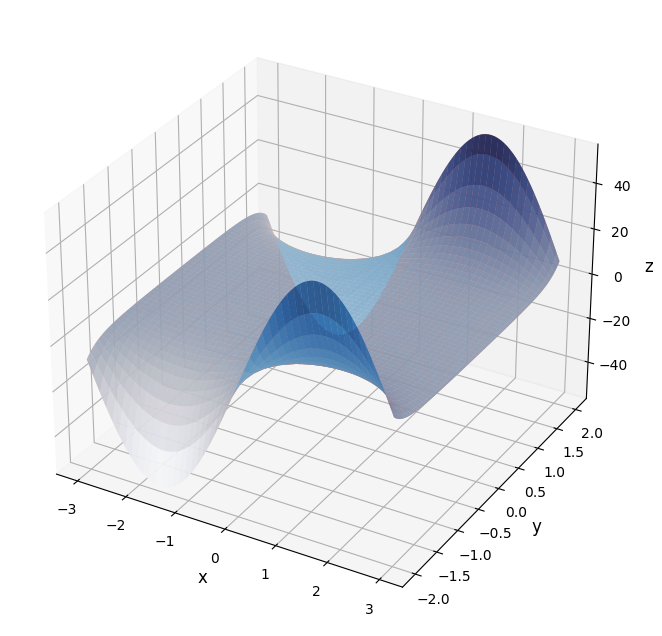

Point: (-2.5, -1.5)
Value of function: -5.678145608677432
Value of interpolation: -5.678148133242023
Difference: 2.524564591155354e-06

Point: (-2.5, 1.5)
Value of function: -5.678145608677432
Value of interpolation: -5.678148133240875
Difference: 2.5245634436288356e-06

Point: (2.5, -1.5)
Value of function: 5.678145608677432
Value of interpolation: 5.678148133240863
Difference: 2.5245634311943377e-06

Point: (2.5, 1.5)
Value of function: 5.678145608677432
Value of interpolation: 5.678148133240543
Difference: 2.5245631114501066e-06

Point: (0, 0)
Value of function: 0.0
Value of interpolation: -4.606467727158153e-17
Difference: 4.606467727158153e-17



In [11]:
# function
func = lambda x, y: np.sin(x) * np.exp(y**2)
# points to measure
xy = [(-2.5, -1.5), (-2.5, 1.5), (2.5, -1.5), (2.5, 1.5), (0, 0)]

# plotting function
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
plt.grid(True)

# plotting function
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
ax.plot_surface(X, Y, Z, cmap='Reds', alpha=0.8, shade=True)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)

# getting interpolation
# N1 - number of nodes for x
N1 = 20
# N2 - number of nodes for y
N2 = 20
x_ = np.linspace(-3, 3, N1)
y_ = np.linspace(-2, 2, N2)
interpolated_function = lagrange_for_2var(func, x_, y_)

# plotting interpolation
Z_ = interpolated_function(X, Y)
ax.plot_surface(X, Y, Z_, cmap='Blues', alpha=0.7, shade=True)

plt.show()

# some statistics
for (xi, yj) in xy:
    print("Point: (", xi, ", ", yj, ")", sep="")
    print("Value of function:", func(xi, yj))
    print("Value of interpolation:", interpolated_function(xi, yj))
    print("Difference:", abs(func(xi, yj) - interpolated_function(xi, yj)))
    print()

In [ ]:
# this code may be slow
# max error
max_error = 0
for i in range(len(x)):
    for j in range(len(y)):
        if abs(func(x[i], y[j]) - interpolated_function(x[i], y[j])) > max_error:
            max_error = abs(func(x[i], y[j]) - interpolated_function(x[i], y[j]))
print("Max error:", max_error)
# for N1 = N2 = 20 output:
# Max error: 0.0005441630027220867 

Метод работает. Однако для многомерного многочлена Лагранжа есть ряд открытых проблем. Например интерполяция может дать несколько решений, отчего следуют проблемы выбора оптимального решения и оценки погрешности. Однако это не отменяет его пользы для интерполяции функций многих переменных